In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

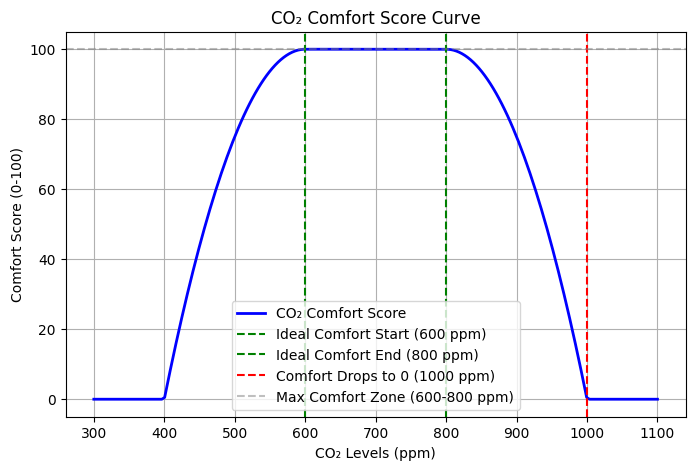

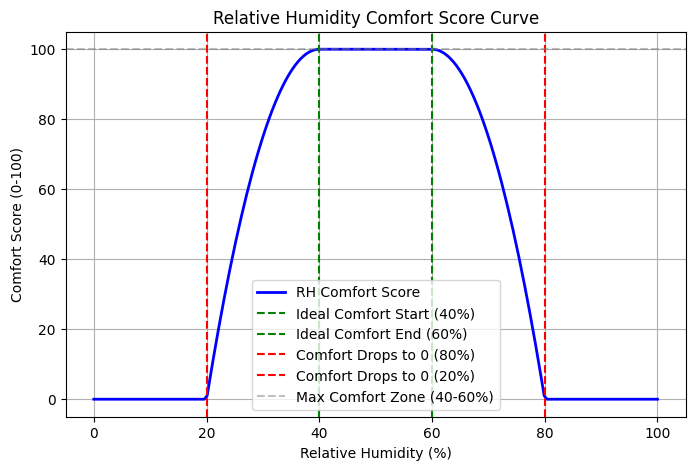

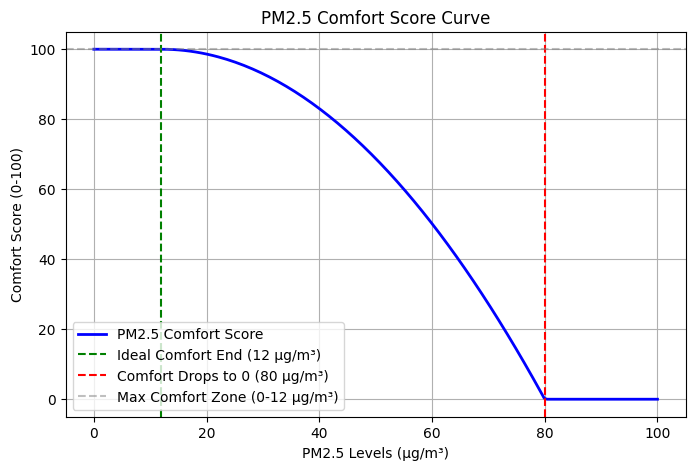

In [24]:
dfs = [pd.read_csv('datasets/madalena_merged/E145.csv'), pd.read_csv('datasets/madalena_merged/E146.csv'),pd.read_csv('datasets/madalena_merged/E147.csv'),pd.read_csv('datasets/madalena_merged/E148.csv'),]

def temperature_calc(temp):
    if temp <= 16 or temp >= 30:
        return 0
    elif 22 <= temp <= 24:
        return 100
    elif 16 < temp < 22:
        return 100 - ((temp - 22) / (22 - 16))**2 * 100  
    elif 24 < temp < 30:
        return 100 - ((temp - 24) / (30 - 24))**2 * 100 

def co2_comfort_score(co2):
    if co2 <= 400 or co2 >= 1000:
        return 0
    elif 600 <= co2 <= 800:
        return 100
    elif 400 < co2 < 600:
        return 100 - ((co2 - 600) / (600 - 400))**2 * 100 
    elif 800 < co2 < 1000:
        return 100 - ((co2 - 800) / (1000 - 800))**2 * 100  

co2_levels_fixed = np.linspace(300, 1100, 200)  
co2_scores_fixed = [co2_comfort_score(co2) for co2 in co2_levels_fixed]

plt.figure(figsize=(8, 5))
plt.plot(co2_levels_fixed, co2_scores_fixed, label="CO₂ Comfort Score", color="blue", linewidth=2)
plt.axvline(x=600, linestyle="--", color="green", label="Ideal Comfort Start (600 ppm)")
plt.axvline(x=800, linestyle="--", color="green", label="Ideal Comfort End (800 ppm)")
plt.axvline(x=1000, linestyle="--", color="red", label="Comfort Drops to 0 (1000 ppm)")
plt.axhline(y=100, linestyle="--", color="gray", alpha=0.5, label="Max Comfort Zone (600-800 ppm)")
plt.xlabel("CO₂ Levels (ppm)")
plt.ylabel("Comfort Score (0-100)")
plt.title("CO₂ Comfort Score Curve")
plt.legend()
plt.grid(True)

plt.show()

def rh_comfort_score(rh):
    if rh <= 20 or rh >= 80:
        return 0
    elif 40 <= rh <= 60:
        return 100
    elif 20 < rh < 40:
        return 100 - ((rh - 40) / (40 - 20))**2 * 100  
    elif 60 < rh < 80:
        return 100 - ((rh - 60) / (80 - 60))**2 * 100  

rh_levels = np.linspace(0, 100, 200)  
rh_scores = [rh_comfort_score(rh) for rh in rh_levels]


plt.figure(figsize=(8, 5))
plt.plot(rh_levels, rh_scores, label="RH Comfort Score", color="blue", linewidth=2)
plt.axvline(x=40, linestyle="--", color="green", label="Ideal Comfort Start (40%)")
plt.axvline(x=60, linestyle="--", color="green", label="Ideal Comfort End (60%)")
plt.axvline(x=80, linestyle="--", color="red", label="Comfort Drops to 0 (80%)")
plt.axvline(x=20, linestyle="--", color="red", label="Comfort Drops to 0 (20%)")
plt.axhline(y=100, linestyle="--", color="gray", alpha=0.5, label="Max Comfort Zone (40-60%)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Comfort Score (0-100)")
plt.title("Relative Humidity Comfort Score Curve")
plt.legend()
plt.grid(True)

plt.show()

def pm25_comfort_score(pm25):
    if pm25 >= 80:
        return 0
    elif pm25 <= 12:
        return 100
    else:
        return 100 - ((pm25 - 12) / (80 - 12))**2 * 100  

pm25_levels_fixed = np.linspace(0, 100, 200)  
pm25_scores_fixed = [pm25_comfort_score(pm25) for pm25 in pm25_levels_fixed]


plt.figure(figsize=(8, 5))
plt.plot(pm25_levels_fixed, pm25_scores_fixed, label="PM2.5 Comfort Score", color="blue", linewidth=2)
plt.axvline(x=12, linestyle="--", color="green", label="Ideal Comfort End (12 µg/m³)")
plt.axvline(x=80, linestyle="--", color="red", label="Comfort Drops to 0 (80 µg/m³)")
plt.axhline(y=100, linestyle="--", color="gray", alpha=0.5, label="Max Comfort Zone (0-12 µg/m³)")
plt.xlabel("PM2.5 Levels (µg/m³)")
plt.ylabel("Comfort Score (0-100)")
plt.title("PM2.5 Comfort Score Curve")
plt.legend()
plt.grid(True)

plt.show()


In [25]:
def calculate_overall_comfort(df):
    df['Temp_Score'] = df['T_in[°C]'].apply(temperature_calc)
    df['RH_Score'] = df['RH [%]'].apply(rh_comfort_score)
    df['CO2_Score'] = df['CO2[ppm]'].apply(co2_comfort_score)
    df['PM2.5_Score'] = df['PM2_5[ug/m3]'].apply(pm25_comfort_score)
    
    df['Thermal_Comfort'] = (df['Temp_Score'] + df['RH_Score']) / 2
    df['IAQ_Score'] = (df['CO2_Score'] + df['PM2.5_Score']) / 2
    
    df['Overall_Comfort'] = 0.5 * df['Thermal_Comfort'] + 0.5 * df['IAQ_Score']
    df.drop(columns=['Temp_Score', 'RH_Score', 'CO2_Score', 'PM2.5_Score', 'Thermal_Comfort', 'IAQ_Score'], inplace=True)

    return df
for index, df in enumerate(dfs):
    dfs[index] = calculate_overall_comfort(df)

In [28]:
dfs[0].shape

(2749, 13)

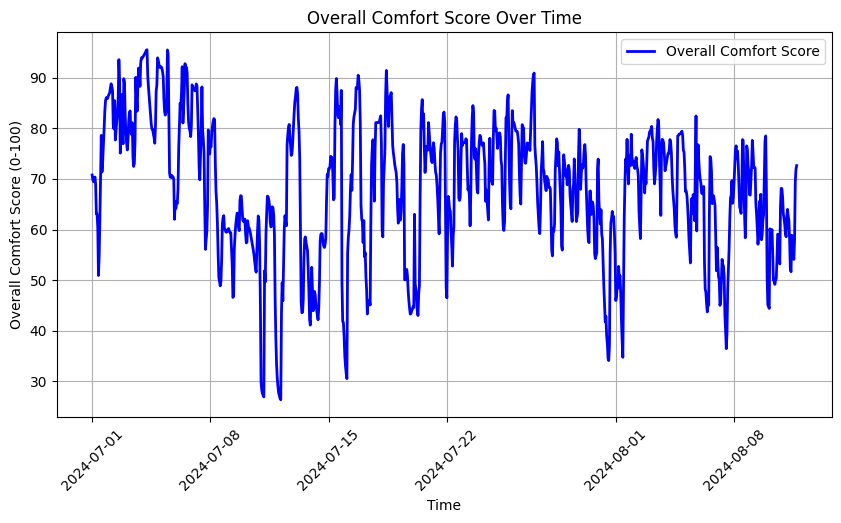

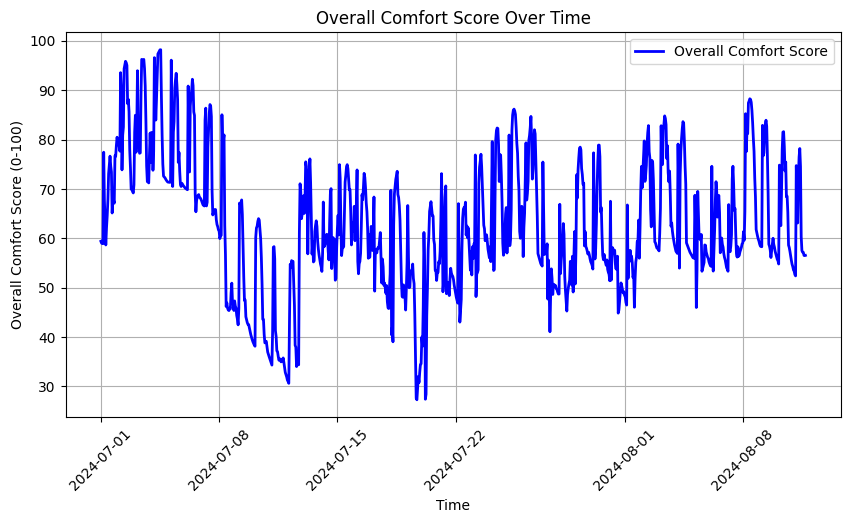

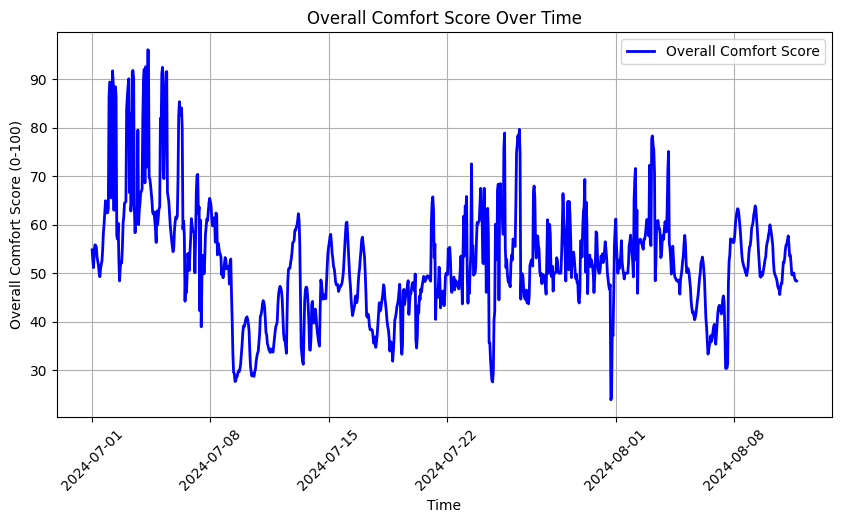

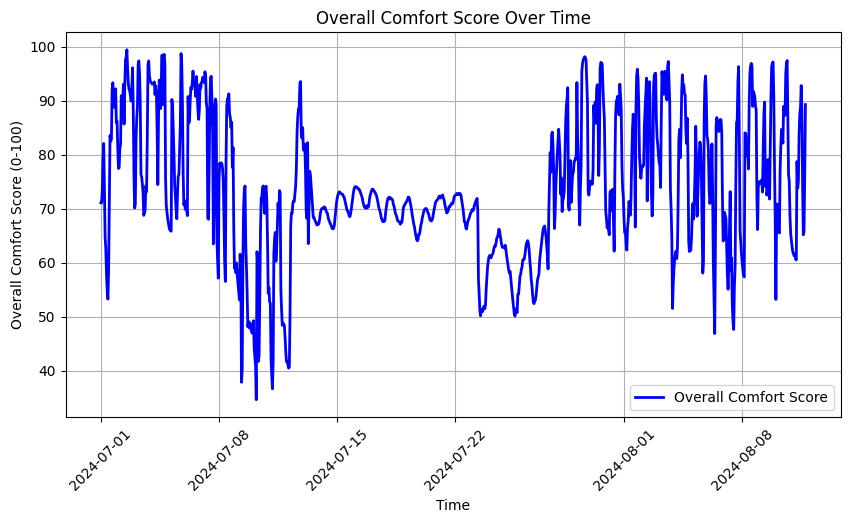

In [29]:
for df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df_temp = df[:1000]
    plt.figure(figsize=(10, 5))
    plt.plot(df_temp['timestamp'], df_temp['Overall_Comfort'], color='blue', linewidth=2, label="Overall Comfort Score")

    plt.xlabel("Time")
    plt.ylabel("Overall Comfort Score (0-100)")
    plt.title("Overall Comfort Score Over Time")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate timestamps for readability

    # Show the plot
    plt.show()